# Washington State Amazon Purchasing Behavior Analysis 2023

The following data mining is an exploritory analysis and prescriptive statistic for Washington State Agency's Amazon purchasing behavior. The following industry intelligence:

A list of all Washington State agencys that have purchased from Amazon.

The top 20 agencies highest spending agencies.
The varaince of spending per top 20 agencies.
The top 20 agencies most purchased item category.
The iteams in the highest spending day of the top agency.
A WordCloud generation of the most common words in the item 'description'.
The highest spending month.
The rate of spending per year covered.
A list of the top spending day per top 10 departments.


H0: There is NO association between the purchase of two or more products.

H1: There is an association between the purchase of two or more products. 

In [2]:
#-- Importing liberaries --#

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
#-- Importing the dataset --#
df = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /State_Agency_Amazon_Spend_Fiscal_Year_23_copy.csv')

In [4]:
#-- Inspecting the Head --#
df.head()

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
0,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,Office Product,Vaultz Combination Lock Box - Secure Safe for ...,1
1,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,"Business, Industrial, & Scientific Supplies Basic","Digital Oral Thermometer for Adult and Kid, Ea...",1
2,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,Home Improvement,"Kidde Carbon Monoxide Detector, AA Battery Pow...",1
3,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,Home Improvement,"GE Personal Security Window and Door Alarm, 4 ...",1
4,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,Home Improvement,"Ataqus Lockable Box, Medicine Lock Box for Saf...",1


In [5]:
#-- Inspecting the shape --#
df.shape

(143926, 8)

In [6]:
#-- Getting descriptive statisitcs --#
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month,143926.0,6.299661,3.356507,1.0,3.00,6.00,9.00,12.0
Day,143926.0,15.437148,8.735188,1.0,8.00,15.00,23.00,31.0
Year,143926.0,2022.555028,0.496964,2022.0,2022.00,2023.00,2023.00,2023.0
Amount,143926.0,365.639507,877.776703,0.0,44.62,118.02,321.11,28107.8
Item_Qty,143926.0,2.131199,4.132029,0.0,1.00,1.00,2.00,239.0


Notice in the above graph that the mean 'Amount' is 365.63 for FY23; Contrastingly, the combined mean for FY21 and 22 was 90.4. Therfore, 365.63 / 90.4 = 4.04 times increase the spending mean. 



In [7]:
#-- Dropping any rows that may have missing values --# 
df.dropna()

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
0,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,Office Product,Vaultz Combination Lock Box - Secure Safe for ...,1
1,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,"Business, Industrial, & Scientific Supplies Basic","Digital Oral Thermometer for Adult and Kid, Ea...",1
2,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,Home Improvement,"Kidde Carbon Monoxide Detector, AA Battery Pow...",1
3,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,Home Improvement,"GE Personal Security Window and Door Alarm, 4 ...",1
4,6,30,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,117.82,Home Improvement,"Ataqus Lockable Box, Medicine Lock Box for Saf...",1
...,...,...,...,...,...,...,...,...
143921,7,1,2022,CORRECTIONS DEPARTMENT OF,540.91,Art and Craft Supply,WEP 939D-II 2-in-1 Wood Burning Kit 86-in-1 wi...,1
143922,7,1,2022,CORRECTIONS DEPARTMENT OF,540.91,"Business, Industrial, & Scientific Supplies Basic","ASNOMY 10PCS Woodworking Twist Drill Bits, Woo...",1
143923,7,1,2022,CORRECTIONS DEPARTMENT OF,540.91,"Business, Industrial, & Scientific Supplies Basic","Fandeli Sandpaper Sheets - Multipurpose 80,120...",2
143924,7,1,2022,CORRECTIONS DEPARTMENT OF,31.37,Home Improvement,8PCS Double Cut Carbide Rotary Burr Set with 1...,1


In [8]:
#-- Drop all duplicate rows --#
df = df.drop_duplicates()
df.shape

(131238, 8)

143926 - 131238 = 12688 duplicate instances 
12688 / 143926 = .08%


In [9]:
#-- Inspecting data types --#
df.dtypes

Month         int64
Day           int64
Year          int64
Agency       object
Amount      float64
Category     object
desc         object
Item_Qty      int64
dtype: object

In [10]:
#-- Generating a list of the unique category types --#

df.Category.unique()

array(['Office Product',
       'Business, Industrial, & Scientific Supplies Basic',
       'Home Improvement', 'Kitchen', 'Health and Beauty', 'Lawn & Patio',
       'Automotive Parts and Accessories', 'Apparel',
       'Electronic Gift Card', 'Baby Product', 'Sports', 'Furniture',
       'PC Accessory', 'Personal Computer', 'Hobby', 'CE', 'Lighting',
       'Wireless', 'Home', 'Toy', 'Art and Craft Supply', 'Beauty',
       'Gift Card', 'Grocery', 'Book', 'Home Theater', 'Shoes',
       'Speakers', 'Photography', 'DVD', 'Guild Product',
       'Musical Instruments', 'Premium Consumer Electronics Brands',
       'Network Media Player', 'Major Appliances', 'Video Games',
       'Software', 'Single Detail Page Misc', 'Amazon Home', 'Luggage',
       'Business, Industrial, & Scientific Supplies', 'Trading Cards',
       'Target Gift Card', 'Watch', 'Amazon SMP', 'Digital Software',
       'Pet Products', 'Amazon Basics', 'Jewelry', 'Music',
       'Prestige Beauty', 'Fabric', 'Amazon Tab

In [11]:
# Get all column names
cols = list(df.columns)

# Find the column with leading/trailing whitespaces (might need adjustments)
old_name = [col for col in cols if col.strip() == 'Agency'][0]  # Finds the column that becomes 'Agency' after stripping

# Rename the column using df.rename
df = df.rename(columns={old_name: 'Agency'})

# Now you can access the column using df.Agency
data = df['Agency']

In [62]:
#-- Saving the dataset to csv --#
df.to_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /cleaned sets/2023', index=False)

# Below is a list of all Washington State agencies whom have purchased from Amazon.

In [12]:
df.Agency.unique()

array(['CHILDREN YOUTH AND FAMILIES DEPT OF',
       'FISH AND WILDLIFE DEPARTMENT OF',
       'CRIMINAL JUSTICE TRAINING COMMISSION WASHINGTON STATE',
       'LABOR AND INDUSTRIES WASHINGTON STATE',
       'NATURAL RESOURCES DEPARTMENT OF',
       'SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)', 'King County',
       'CORRECTIONS DEPARTMENT OF', 'EMPLOYMENT SECURITY DEPARTMENT OF',
       'AUDITOR OFFICE OF THE STATE', 'ATTORNEY GENERAL OFFICE OF THE',
       'PUBLIC EMPLOYMENT RELATIONS COMMISSION', 'City of Ephrata',
       'SECRETARY OF STATE OFFICE OF',
       'VETERANS AFFAIRS WASHINGTON STATE DEPARTMENT OF',
       'RETIREMENT SYSTEMS DEPARTMENT OF',
       'PUBLIC INSTRUCTION SUPERINTENDENT OF', 'HUMAN RIGHTS COMMISSION',
       'UTILITIES AND TRANSPORTATION COMMISSION',
       'AGRICULTURE DEPARTMENT OF', 'ECOLOGY DEPARTMENT OF',
       'TREASURER OFFICE OF THE STATE', 'Kitsap Transit',
       'Health Care Authority', 'Port of Whitman',
       'PARKS AND RECREATION COMMISSIO

# Below is a list of the top Washington State agencies per Amazon 2023 spending in descending order.

In [57]:
#-- Outputting the top 20 Agencys by spending --#
top_20_agencies = df.groupby('Agency')['Amount'].sum().nlargest(20).reset_index()

top_20_agencies

,Agency,Amount
0,CHILDREN YOUTH AND FAMILIES DEPT OF,13275569.02
1,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),7785882.26
2,CORRECTIONS DEPARTMENT OF,3603458.17
3,FISH AND WILDLIFE DEPARTMENT OF,1894314.81
4,NATURAL RESOURCES DEPARTMENT OF,1555170.41
5,PUBLIC INSTRUCTION SUPERINTENDENT OF,1113448.42
6,LABOR AND INDUSTRIES WASHINGTON STATE,1064996.44
7,PARKS AND RECREATION COMMISSION WASHINGTON STATE,842394.11
8,TRANSPORTATION DEPARTMENT OF,513219.69
9,SECRETARY OF STATE OFFICE OF,497763.19


Below is a barchart of all the above list

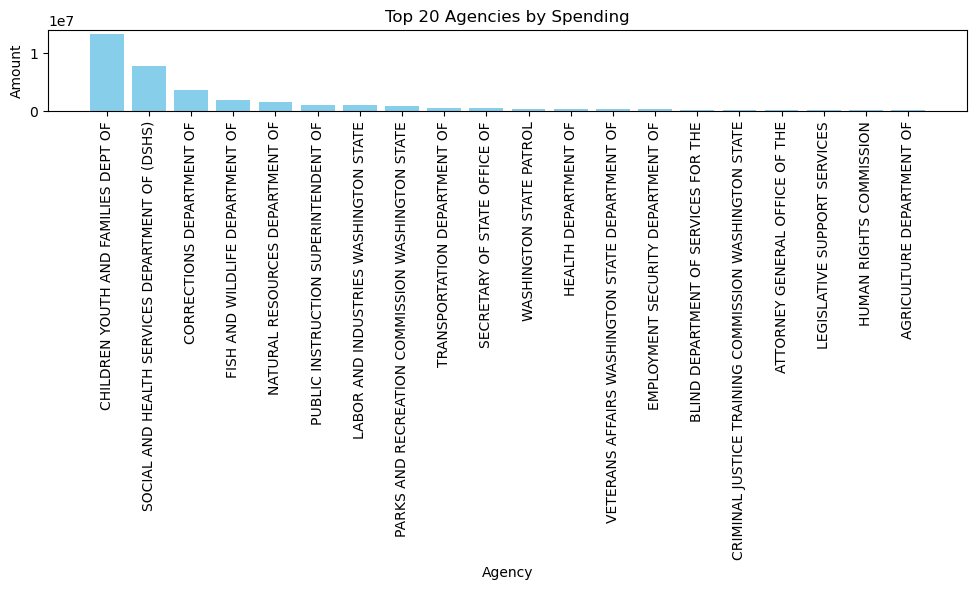

In [14]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_20_agencies['Agency'], top_20_agencies['Amount'], color='skyblue')
plt.xlabel('Agency')
plt.ylabel('Amount')
plt.title('Top 20 Agencies by Spending')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Below is the variance of spending amount per agency

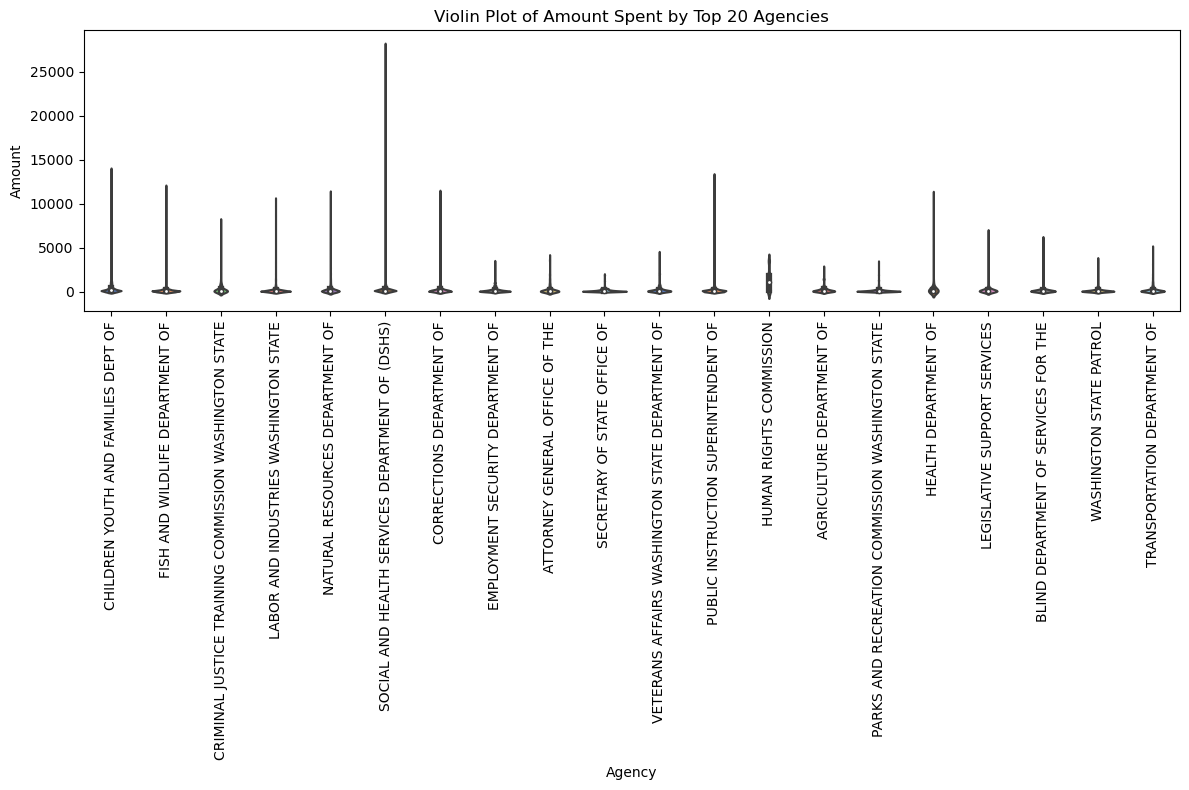

In [15]:
top_20_agency_names = top_20_agencies['Agency']
filtered_df = df[df['Agency'].isin(top_20_agency_names)]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Agency', y='Amount', data=filtered_df, palette='muted')
plt.xlabel('Agency')
plt.ylabel('Amount')
plt.title('Violin Plot of Amount Spent by Top 20 Agencies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

According to the above graph, Socail and Health Services Department(DSHS) has the most variance in spending; Well over $25,000 and almost double the amount of the average per department. 

# Below is a list of the Top 20 agencies and the top product 'Category'.

Notice that 'Personal Computer' is the most commonly purchased 'Category'.

In [16]:
#-- Create an empty dataframe to store the results. --#
top_category_per_agency = pd.DataFrame(columns=['Agency', 'Top_Category', 'Amount_Spent'])

#-- Iterate over the top 20 agencies --#
for index, row in top_20_agencies.iterrows():
    agency_name = row['Agency']
    agency_df = df[df['Agency'] == agency_name]
    top_category = agency_df.groupby('Category')['Amount'].sum().idxmax()
    amount_spent = agency_df.groupby('Category')['Amount'].sum().max()
    top_category_per_agency = top_category_per_agency.append({'Agency': agency_name, 'Top_Category': top_category, 'Amount_Spent': amount_spent}, ignore_index=True)

top_category_per_agency

,Agency,Top_Category,Amount_Spent
0,CHILDREN YOUTH AND FAMILIES DEPT OF,Baby Product,2833260.99
1,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),Apparel,1094132.47
2,CORRECTIONS DEPARTMENT OF,Book,382309.16
3,FISH AND WILDLIFE DEPARTMENT OF,Personal Computer,251465.54
4,NATURAL RESOURCES DEPARTMENT OF,Home Improvement,202355.18
5,PUBLIC INSTRUCTION SUPERINTENDENT OF,Office Product,202093.74
6,LABOR AND INDUSTRIES WASHINGTON STATE,Office Product,210992.63
7,PARKS AND RECREATION COMMISSION WASHINGTON STATE,Home Improvement,201570.46
8,TRANSPORTATION DEPARTMENT OF,CE,95690.55
9,SECRETARY OF STATE OFFICE OF,Book,161587.74


# Below is a list of the top spending day by 'Amount' per CHILDREN YOUTH AND FAMILIES

In [61]:
filtered_rows = df[df['Agency'].str.contains('CHILDREN YOUTH AND FAMILIES DEPT OF')]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
1973,6,23,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,13904.87,Toy,Xylolin Over-Sized Hollow Wooden Block Set for...,1
1994,6,23,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,13904.87,Lawn & Patio,18 Pairs Kids Gardening Gloves Children Garden...,5
1995,6,23,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,13904.87,Lawn & Patio,12 Pairs Kids Garden Gloves Children Gardening...,5
2033,6,23,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,13904.87,Lawn & Patio,Joottuan 6 Pairs Kids Gardening Gloves Yard Wo...,5
2598,6,22,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,9733.32,Kitchen,"Topcee Weighted Blanket for Kids(5lbs 36""x48"")...",0
134436,8,1,2022,CHILDREN YOUTH AND FAMILIES DEPT OF,9379.95,Personal Computer,"Newest HP Notebook Laptop, 15.6"" HD Touchscree...",15
2085,6,23,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,6249.69,Toy,"Sensory Water Beads Toy for Kids 6 Pack, Shape...",3
2083,6,23,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,6249.69,Toy,"Sensory Water Beads Toy for Kids 6 Pack, Shape...",17
2076,6,23,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,6249.69,"Business, Industrial, & Scientific Supplies Basic","hand2mind Sensory Fidget Tubes, Calming Toys f...",14
2084,6,23,2023,CHILDREN YOUTH AND FAMILIES DEPT OF,6249.69,Toy,"Pull, Stretch and Squeeze Stress Balls by YoYa...",18


In [58]:
filtered_rows = df[df['Agency'].str.contains("SOCIAL AND HEALTH SERVICES DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
13807,6,1,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),28107.80,"Business, Industrial, & Scientific Supplies Basic",Philips HeartStart Home AED Defibrillator with...,4
13809,6,1,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),28107.80,"Business, Industrial, & Scientific Supplies Basic",Philips HeartStart Home AED Defibrillator with...,5
23627,5,15,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),22500.05,Beauty,Philips Norelco Shaver 2300 Rechargeable Elect...,22
23634,5,15,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),22500.05,Beauty,Remington WDF4821US Smooth & Silky Electric Sh...,31
23621,5,15,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),22500.05,Beauty,Philips Norelco Shaver 2300 Rechargeable Elect...,21
23620,5,15,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),22500.05,Beauty,Remington WDF4821US Smooth & Silky Electric Sh...,32
39430,4,11,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),18171.72,Personal Computer,Microsoft 8PT-00001 Surface Pro 8 13'' Touchsc...,14
56820,3,2,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),9625.00,PC Accessory,"Microsoft Surface Hub 2 50"" PixelSense Display...",1
43227,4,3,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),9514.06,CE,APCRBC159-UPC Replacement Battery for APCRBC15...,38
55738,3,6,2023,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),7747.27,Health and Beauty,"Hoyer HPL700 Classic Bariatric Patient Lift, 7...",1


In [60]:
filtered_rows = df[df['Agency'].str.contains("FISH AND WILDLIFE DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
26291,5,9,2023,FISH AND WILDLIFE DEPARTMENT OF,11979.25,Home Theater,SAMSUNG 75-Inch Class Neo QLED QN90A Series - ...,5
4320,6,21,2023,FISH AND WILDLIFE DEPARTMENT OF,9845.19,Photography,Vortex Optics Razor HD Roof Prism Binoculars 1...,9
99820,11,3,2022,FISH AND WILDLIFE DEPARTMENT OF,8592.10,Personal Computer,"Panasonic Toughpad G1, FZ-G1 MK4, i5-6300U 2.4...",2
99821,11,3,2022,FISH AND WILDLIFE DEPARTMENT OF,8592.10,Personal Computer,"Panasonic Toughpad G1, FZ-G1 MK4, i5-6300U 2.4...",3
99823,11,3,2022,FISH AND WILDLIFE DEPARTMENT OF,8592.10,Personal Computer,"Panasonic Toughpad FZ-G1 MK5, Intel Core i5-73...",1
99826,11,3,2022,FISH AND WILDLIFE DEPARTMENT OF,8592.10,Personal Computer,"Panasonic Toughpad G1, FZ-G1 MK4, i5-6300U 2.4...",1
99827,11,3,2022,FISH AND WILDLIFE DEPARTMENT OF,8592.10,Personal Computer,"Panasonic Toughpad G1, FZ-G1 MK4, Intel Core i...",1
67978,2,2,2023,FISH AND WILDLIFE DEPARTMENT OF,6307.20,Personal Computer,"Panasonic Toughpad G1, FZ-G1 MK4, Intel Core i...",2
67980,2,2,2023,FISH AND WILDLIFE DEPARTMENT OF,6307.20,Personal Computer,"Panasonic Toughpad G1, FZ-G1 MK4, Intel Core i...",3
67977,2,2,2023,FISH AND WILDLIFE DEPARTMENT OF,6307.20,Personal Computer,"Panasonic Toughpad G1, FZ-G1 MK4, Intel Core i...",1


In [47]:
filtered_rows = df[df['Agency'].str.contains('CORRECTIONS DEPARTMENT OF')]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
117859,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",45
117866,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",24
117856,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",48
117857,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",44
117858,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",47
117862,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",65
117863,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",58
117864,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",34
117865,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",26
117855,9,19,2022,CORRECTIONS DEPARTMENT OF,11360.00,Book,"The Coaching Habit: Say Less, Ask More & Chang...",63


In [51]:
filtered_rows = df[df['Agency'].str.contains("NATURAL RESOURCES DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
69104,1,31,2023,NATURAL RESOURCES DEPARTMENT OF,11185.42,Home Theater,2-Pack DJI Mavic 2 Intelligent Flight Battery ...,3
69109,1,31,2023,NATURAL RESOURCES DEPARTMENT OF,11185.42,Photography,DJI Mavic 2 Pro - Drone Quadcopter UAV with Ha...,2
69106,1,31,2023,NATURAL RESOURCES DEPARTMENT OF,11185.42,Photography,Lens Filters for DJI Mavic 2 Pro Camera Lens S...,3
69107,1,31,2023,NATURAL RESOURCES DEPARTMENT OF,11185.42,Photography,DJI Mavic 2 Pro - Drone Quadcopter UAV with Ha...,1
69108,1,31,2023,NATURAL RESOURCES DEPARTMENT OF,11185.42,Photography,DJI Mavic 2 Fly More Kit for Mavic 2 PRO & Mav...,3
69105,1,31,2023,NATURAL RESOURCES DEPARTMENT OF,11185.42,Home Improvement,"BOSTITCH Hammer Stapler for Construction, 1/4-...",1
42004,4,5,2023,NATURAL RESOURCES DEPARTMENT OF,6515.85,Home Improvement,"Goal Zero Yeti 1500X Portable Power Station, 1...",3
48751,3,21,2023,NATURAL RESOURCES DEPARTMENT OF,5998.30,Home Theater,SAMSUNG 55-Inch Class Crystal 4K UHD AU8000 Se...,1
141132,7,12,2022,NATURAL RESOURCES DEPARTMENT OF,5240.67,Sports,Igloo 5 Gallon Portable Sports Cooler Water Be...,2
141152,7,12,2022,NATURAL RESOURCES DEPARTMENT OF,5240.67,Sports,Igloo 5 Gallon Portable Sports Cooler Water Be...,3


In [52]:
filtered_rows = df[df['Agency'].str.contains("PUBLIC INSTRUCTION SUPERINTENDENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
1508,6,26,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,13271.40,Personal Computer,SanDisk Professional 32TB G-RAID Shuttle SSD -...,1
9850,6,8,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,5942.34,Lawn & Patio,AeroGarden Farm 24XL with Salad Bar Seed Pod K...,1
16745,5,25,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,3897.73,Kitchen,DASH Tasti-CrispTM Electric Air Fryer + Oven C...,4
16744,5,25,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,3897.73,Kitchen,KitchenAid KSM150PSAQ Artisan Series 5-Qt. Sta...,1
16747,5,25,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,3897.73,Kitchen,DASH Tasti-CrispTM Electric Air Fryer + Oven C...,3
16750,5,25,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,3897.73,Kitchen,"Stand Mixer Cover,Kitchen Mixer Cover Compatib...",7
69206,1,31,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,3179.83,Personal Computer,HP 27-inch QHD Gaming with Tilt/Height Adjustm...,1
69207,1,31,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,3179.83,CE,Surge Protector Power Strip - 10 FT Extension ...,6
69208,1,31,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,3179.83,Personal Computer,"Logitech Brio 4K Webcam, Ultra 4K HD Video Cal...",5
69210,1,31,2023,PUBLIC INSTRUCTION SUPERINTENDENT OF,3179.83,CE,"Amazon Basics High-Speed HDMI Cable (18Gbps, 4...",3


In [53]:
filtered_rows = df[df['Agency'].str.contains("LABOR AND INDUSTRIES WASHINGTON STATE")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
74551,1,17,2023,LABOR AND INDUSTRIES WASHINGTON STATE,10512.86,Office Product,WALI Premium Dual LCD Monitor Desk Mount Fully...,2
74550,1,17,2023,LABOR AND INDUSTRIES WASHINGTON STATE,10512.86,Office Product,WALI Premium Dual LCD Monitor Desk Mount Fully...,3
111941,10,3,2022,LABOR AND INDUSTRIES WASHINGTON STATE,9654.00,Office Product,WALI Premium Dual LCD Monitor Desk Mount Fully...,2
111917,10,3,2022,LABOR AND INDUSTRIES WASHINGTON STATE,9654.00,Office Product,WALI Premium Dual LCD Monitor Desk Mount Fully...,3
17549,5,24,2023,LABOR AND INDUSTRIES WASHINGTON STATE,8677.90,Speakers,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,8
17545,5,24,2023,LABOR AND INDUSTRIES WASHINGTON STATE,8677.90,Speakers,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,11
17544,5,24,2023,LABOR AND INDUSTRIES WASHINGTON STATE,8677.90,Speakers,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,4
78235,1,6,2023,LABOR AND INDUSTRIES WASHINGTON STATE,7620.00,Speakers,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,80
138629,7,19,2022,LABOR AND INDUSTRIES WASHINGTON STATE,7228.00,Speakers,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,10
12175,6,5,2023,LABOR AND INDUSTRIES WASHINGTON STATE,5682.95,Wireless,Poly - Voyager 4310 UC Wireless Headset + Char...,35


In [54]:
filtered_rows = df[df['Agency'].str.contains("PARKS AND RECREATION COMMISSION WASHINGTON STATE")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
78452,1,5,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3411.66,Home Improvement,LEVEL5 Automatic Drywall Taping and Finishing ...,1
62764,2,15,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3249.61,Home Improvement,Calculated Industries 4019 Material Estimator ...,12
62763,2,15,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3249.61,Home Improvement,Calculated Industries 4019 Material Estimator ...,9
62768,2,15,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3249.61,Home Improvement,Calculated Industries 4019 Material Estimator ...,18
62766,2,15,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3249.61,Home Improvement,Calculated Industries 4019 Material Estimator ...,10
62762,2,15,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3249.61,Home Improvement,Calculated Industries 4019 Material Estimator ...,15
62791,2,15,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3247.40,Office Product,"Saunders Metal Clipboard with Storage, Letter ...",10
62794,2,15,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3247.40,Office Product,"Saunders Metal Clipboard with Storage, Letter ...",8
6380,6,15,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3224.32,Major Appliances,"DAIKIN 12,000 BTU 19 SEER Ductless Mini Split ...",2
71847,1,24,2023,PARKS AND RECREATION COMMISSION WASHINGTON STATE,3120.22,Furniture,ZINUS 12 Inch Euro Top Pocket Spring Hybrid Ma...,1


In [55]:
filtered_rows = df[df['Agency'].str.contains("TRANSPORTATION DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
12133,6,5,2023,TRANSPORTATION DEPARTMENT OF,5009.39,"Business, Industrial, & Scientific Supplies Basic",Billy Goat BC2600ICM Briggs Fixed Deck Brush C...,1
106871,10,17,2022,TRANSPORTATION DEPARTMENT OF,4481.00,Furniture,Vibe Gel Memory Foam 12-Inch Mattress | CertiP...,1
107067,10,14,2022,TRANSPORTATION DEPARTMENT OF,4035.20,"Business, Industrial, & Scientific Supplies Basic",Honeywell 1900GSR-2-2 Xenon Series 1900 Area-I...,10
107068,10,14,2022,TRANSPORTATION DEPARTMENT OF,4035.20,Personal Computer,"HONEYWELL, XENON 1900, STAND, GRAY, 15CM, (6) ...",10
109758,10,7,2022,TRANSPORTATION DEPARTMENT OF,3797.08,CE,Pelican Color Case Black & Blue Pelican 1535 A...,14
19274,5,22,2023,TRANSPORTATION DEPARTMENT OF,3589.68,Personal Computer,"Acer B276HUL Aymiidprz 27"" WQHD (2560 x 1440) ...",8
90842,11,30,2022,TRANSPORTATION DEPARTMENT OF,3181.35,Home Improvement,CST/berger 19-202SC MagnaTrak 202 Series Magne...,5
134682,7,29,2022,TRANSPORTATION DEPARTMENT OF,3157.20,CE,"Logitech H390 Wired Headset, Stereo Headphones...",10
134681,7,29,2022,TRANSPORTATION DEPARTMENT OF,3157.20,Personal Computer,USB Extension Cable (16 Feet/5M) for The Meeti...,18
134680,7,29,2022,TRANSPORTATION DEPARTMENT OF,3157.20,PC Accessory,Logitech BRIO - Ultra HD Webcam for Video Conf...,10


In [56]:
filtered_rows = df[df['Agency'].str.contains("SECRETARY OF STATE OFFICE OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Amount,Category,desc,Item_Qty
24322,5,12,2023,SECRETARY OF STATE OFFICE OF,1966.64,Musical Instruments,Electro-Voice RE20 Broadcast Announcer Microph...,4
36168,4,19,2023,SECRETARY OF STATE OFFICE OF,1886.52,Photography,Smatree Waterproof Hard Case Compatible for Go...,1
36169,4,19,2023,SECRETARY OF STATE OFFICE OF,1886.52,Home Improvement,Delifox 2 Pack Pen Holder Pen Organizer for De...,3
36171,4,19,2023,SECRETARY OF STATE OFFICE OF,1886.52,CE,"Flat Plug Extension Cord 25 ft, NTONPOWER Powe...",1
36167,4,19,2023,SECRETARY OF STATE OFFICE OF,1886.52,Office Product,"2Pcs Expanding File Folder, 13 Pockets Accordi...",2
36166,4,19,2023,SECRETARY OF STATE OFFICE OF,1886.52,Photography,"Zhiyun Crane M2S Handheld 3-Axis Stabilizer, G...",1
36172,4,19,2023,SECRETARY OF STATE OFFICE OF,1886.52,CE,ClearClick Video to Digital Converter 2.0 (Sec...,1
36173,4,19,2023,SECRETARY OF STATE OFFICE OF,1886.52,Photography,"Gimbal Stabilizer for Smartphone, 3-Axis Phone...",1
36174,4,19,2023,SECRETARY OF STATE OFFICE OF,1886.52,Musical Instruments,"Zoom LBC-1 Li-Ion Battery Charger, Charges the...",1
36175,4,19,2023,SECRETARY OF STATE OFFICE OF,1886.52,Personal Computer,KROSER Laptop Bag Stylish Laptop Briefcase Fit...,1


# Below is a WordCloud output of the product descriptions; Word size indicates frequency. 

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Ima

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow

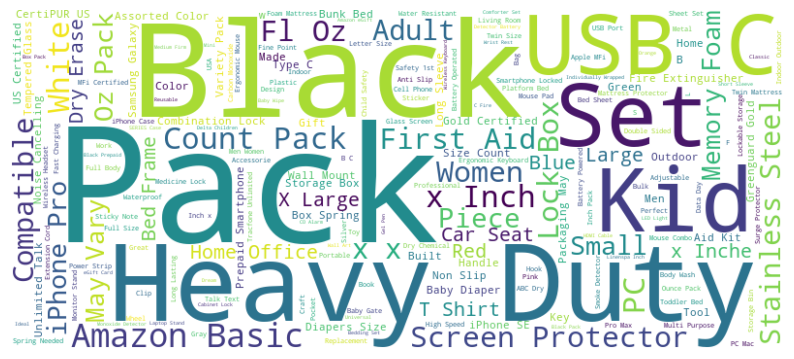

In [19]:
#-- Concatenate all text data into a single string --#
text = ' '.join(df["desc"])

#-- Generate the word cloud --#
wordcloud = WordCloud(width=800, height=350, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the above WordCloud, it would appear the Government likes 'Heavy Duty' and perfers the color 'Black' while white is a trailing second color preference.  

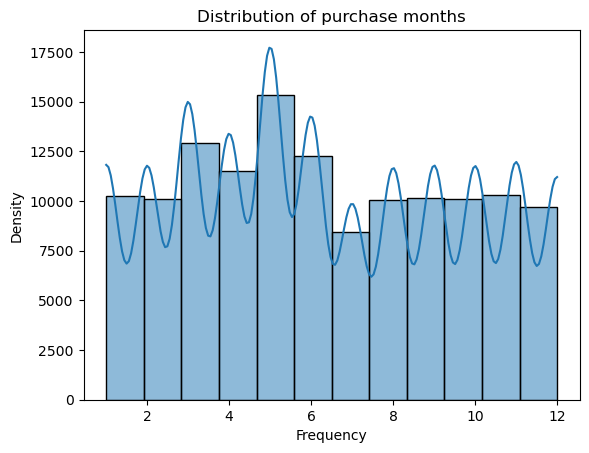

In [20]:
#-- Create a histogram of purchase months --#
sns.histplot(
    data=df,      
    x="Month",  
    bins=12,          
    kde=True          
)
#-- Add a title and axis labels --#
plt.title("Distribution of purchase months")
plt.xlabel("Frequency")
plt.ylabel("Density")

# Show the plot
plt.show()

From the above graph, it appears that March, April, May, and June are the highest months, then the months remain constaint. Almost as if all departments recieved a repremanding email in July, then stayed very consistant at the 11,000 mark; Continuing from August to December. 

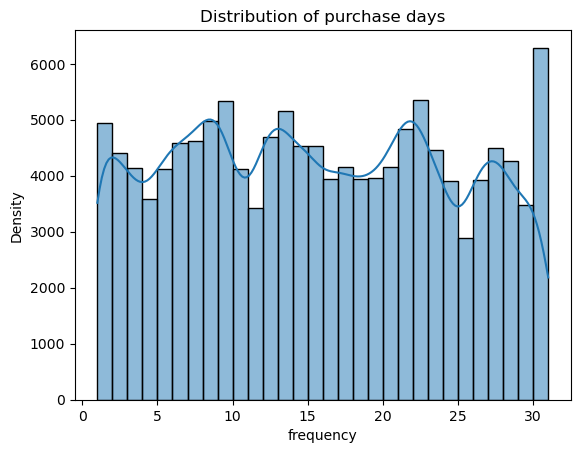

In [21]:
#-- Create a histogram of Days --#
sns.histplot(
    data=df,        # Data source
    x="Day",  # Variable for the histogram
    bins=30,          # Number of bins (optional, defaults to 30)
    kde=True          # Add a kernel density estimate (optional)
)

# Add a title and axis labels
plt.title("Distribution of purchase days")
plt.xlabel("frequency")
plt.ylabel("Density")

# Show the plot
plt.show()

From the above graph, the purchase days of the week stay random.

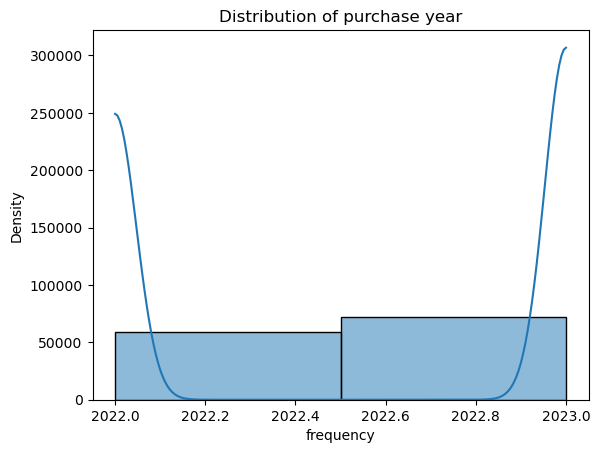

In [22]:
#-- Create a histogram of Purchase Year --#
sns.histplot(
    data=df,        # Data source
    x="Year",  # Variable for the histogram
    bins=2,          # Number of bins (optional, defaults to 10)
    kde=True          # Add a kernel density estimate (optional)
)

# Add a title and axis labels
plt.title("Distribution of purchase year")
plt.xlabel("frequency")
plt.ylabel("Density")

# Show the plot
plt.show()

It would appear that 2023 had more frequency of Amazon spending vs. 2022.

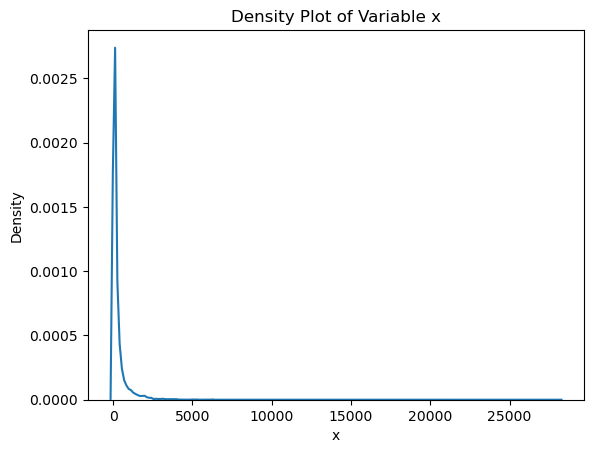

In [23]:
#-- Create a density plot for variable 'x' --#
sns.kdeplot(
    data=df,
    x="Amount"  # Variable to plot the density of
)

# Add a title and axis labels
plt.title("Density Plot of Variable x")
plt.xlabel("x")
plt.ylabel("Density")

# Show the plot
plt.show()

In [25]:
#-- Converting categorical binary with the get_dummies() function --#

dummy_categories = pd.get_dummies(df['Category'], drop_first=True)

dummy_categories
df1 = pd.concat([new_df['Amount'], dummy_categories], axis=1)
df1

,Amount,Amazon Basics,Amazon Devices,Amazon Ereaders,Amazon Home,Amazon SMP,Amazon Tablets,Apparel,Art,Art and Craft Supply,...,Subscribe with Amazon - Physical,Target Gift Card,Toy,Trading Cards,VDO Devices,Video Games,Watch,Wireless,Woodworking Tools,eBooks
0,117.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,117.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,117.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,117.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,117.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143921,540.91,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
143922,540.91,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143923,540.91,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143924,31.37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Now exploring the data with the Unsupervised Machine Learning models of Principal Component Analysis and KMeans Cluster Analysis. 

The dataset is decomposed in to Eigen vectors of Eigen values or Principal Components PCs. The variences of PCs are explored in the following two graphs. 

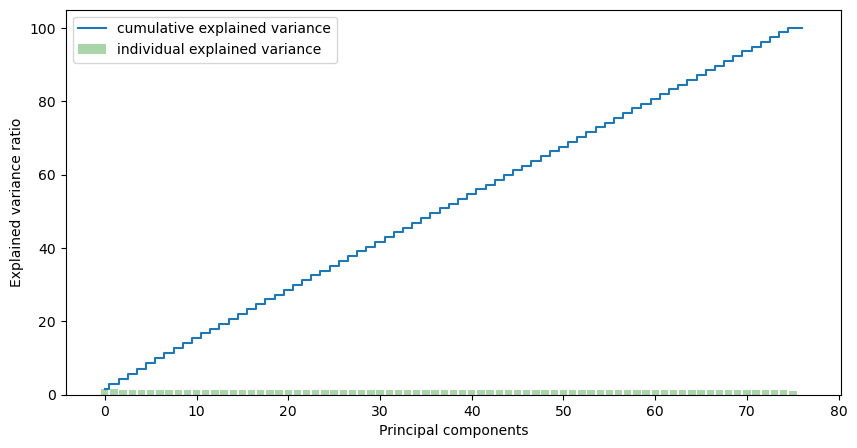

In [26]:
#-- Scaling the data --#
#-- Create the object --#
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
 #-- Calculate the mean and Standard deviation --#
#-- Conducting PCA --#
#-- Calculating Eigenvectors and eigenvalues of Cov matrix --#
mean_vec = np.mean(df_scaled, axis=0)
cov_mat = np.cov(df_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#-- Create a list of (eigenvalue, eigenvector) tuples --#
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
#-- Sort from high to low --#
eig_pairs.sort(key = lambda x: x[0], reverse= True)
 
#-- Calculation of Explained Variance from the eigenvalues --#
tot = sum(eig_vals)
#-- Individual explained variance --#
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
#-- Cumulative explained variance --#
cum_var_exp = np.cumsum(var_exp)
 
#-- Plot out the variances superimposed --#
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'K-means with PCA clustering ')

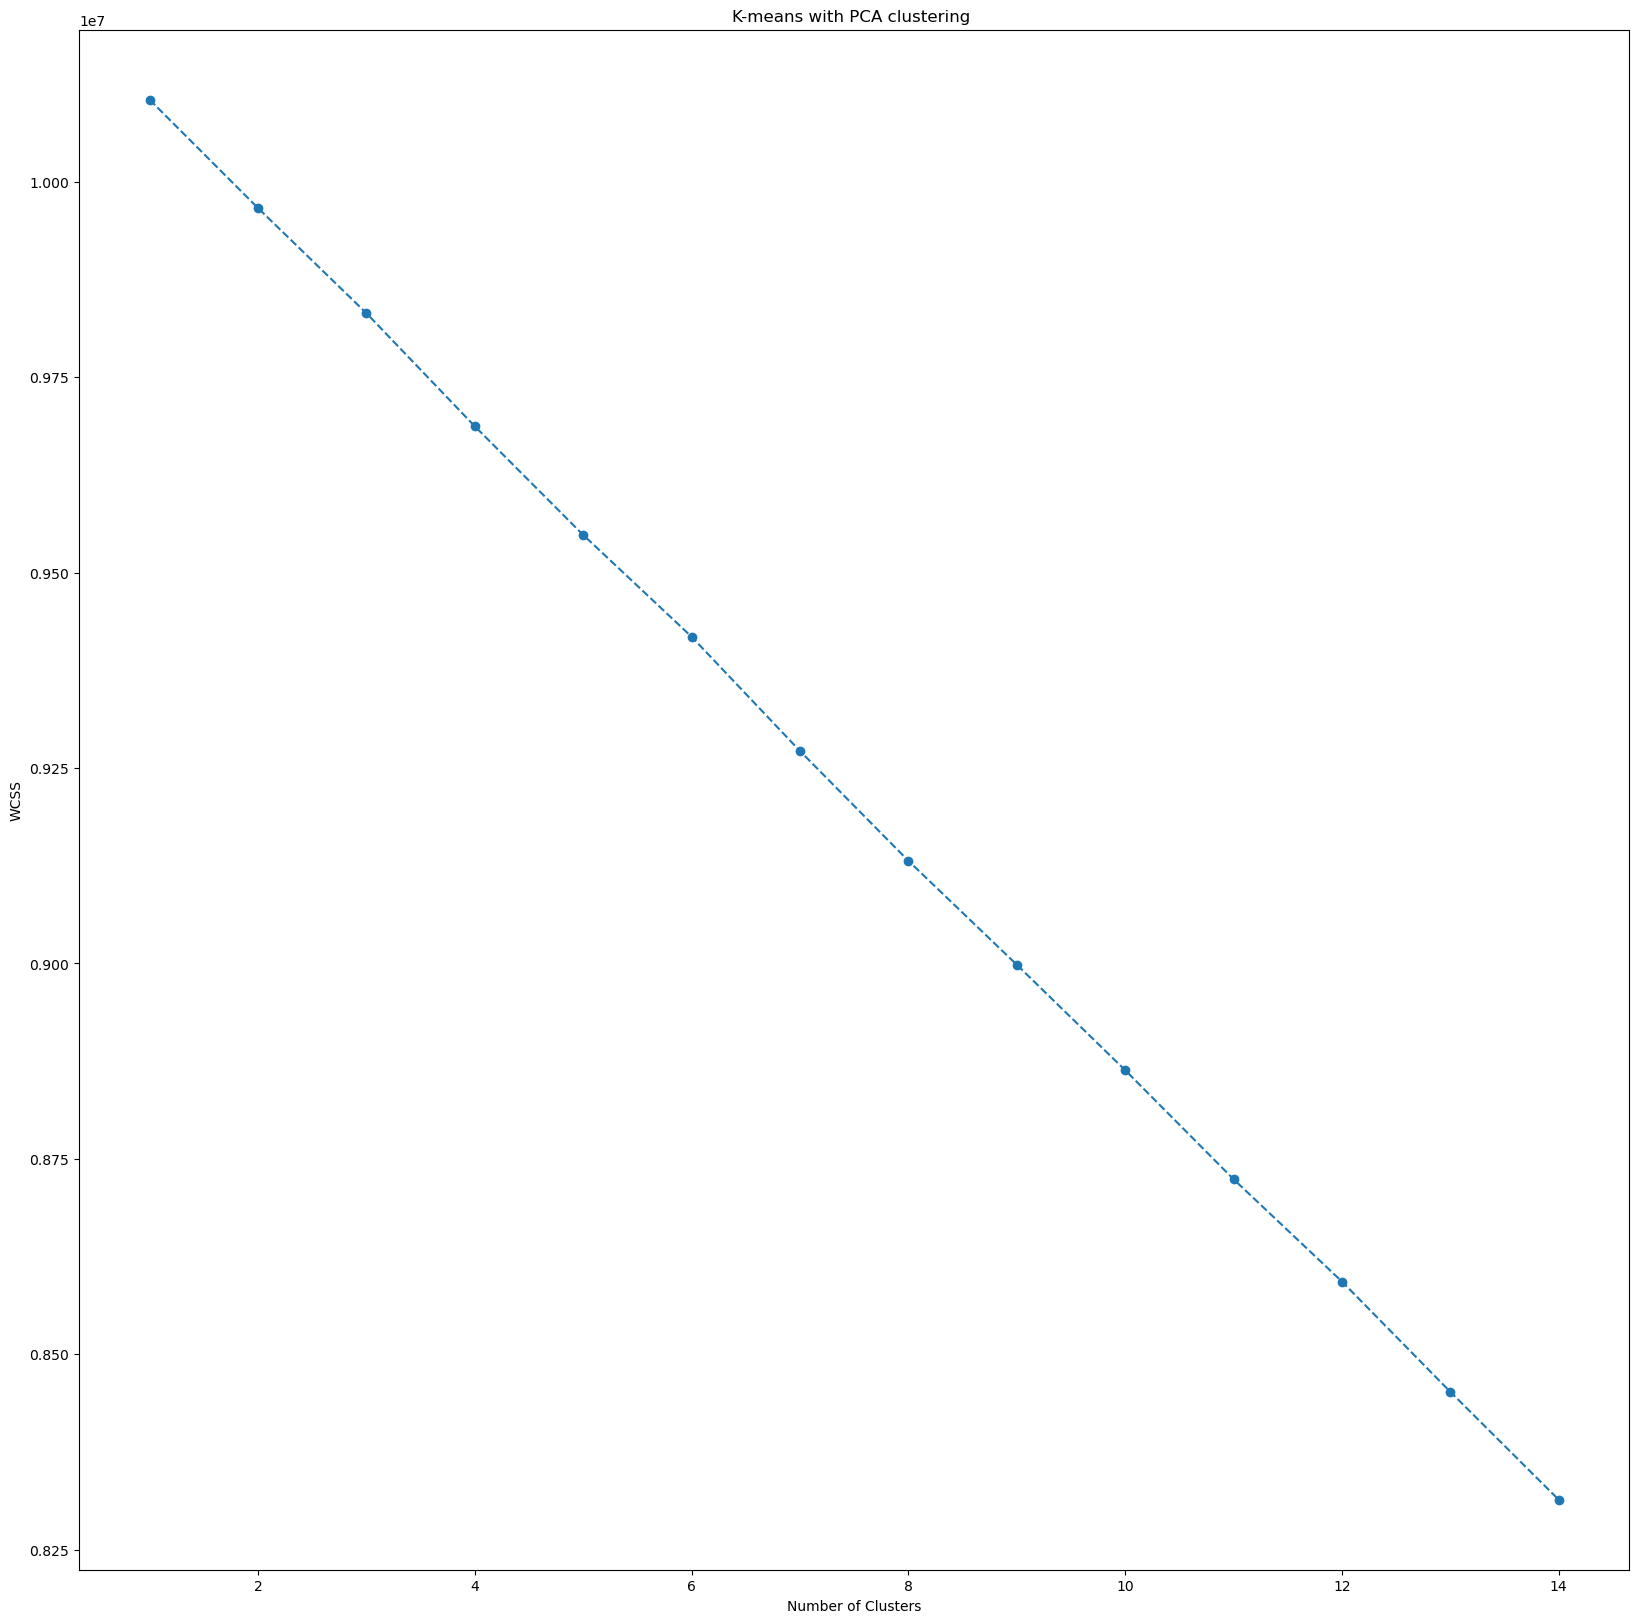

In [27]:
#-- Determining the number of clusters with the Elbow Method --#
#-- Kmeans clustering with PCA --#
wcss = [] #-- sum of squares of distances of datapoints --#
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans_pca.fit(df_scaled)
    wcss.append(kmeans_pca.inertia_)
 
#-- Now plotting the Elbow Graph --#
plt.figure(figsize = (20,20))
plt.plot(range(1,15), wcss, marker ='o', linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering ')

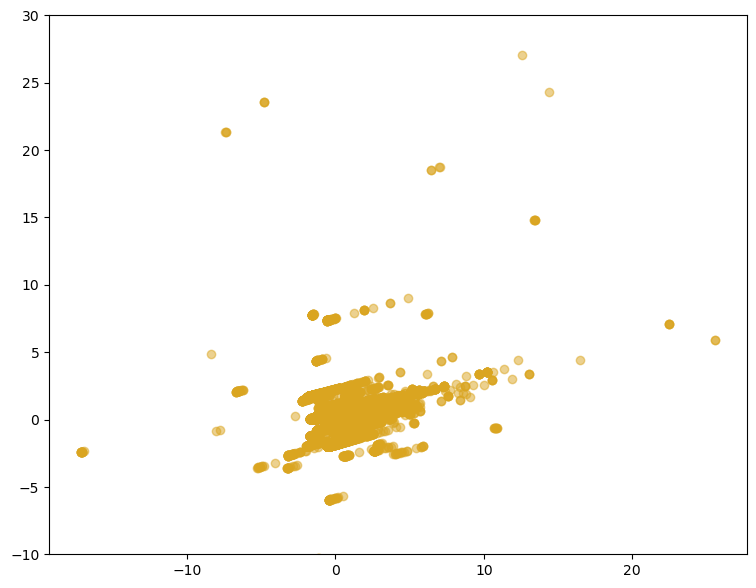

In [28]:
#-- Exploring how the data clusters when transformed with PCA and ‘k’ =1 --#

pca = PCA(n_components=22)

pca_kmeans = pca.fit_transform(df_scaled)

plt.figure(figsize = (9,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,1], c='goldenrod',alpha=0.5)

plt.ylim(-10,30)

plt.show()

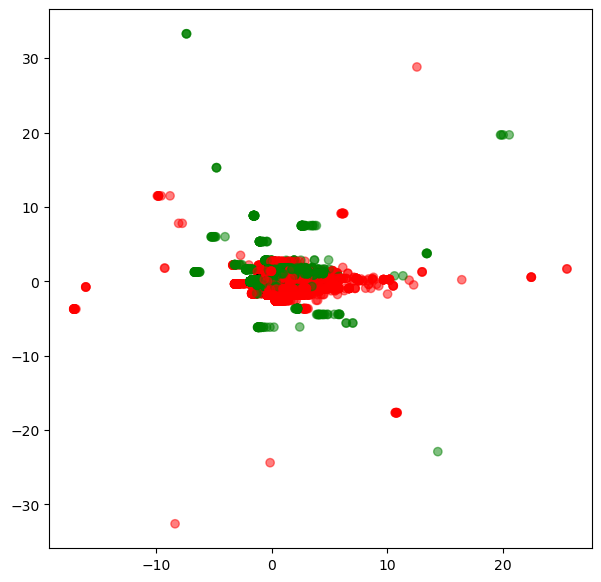

In [29]:
#-- Now running KMeans with 2 clusters --#

kmeans_pca = KMeans(n_clusters =2, init = 'k-means++', random_state = 42)

#-- Kmeans with two clusters --#

#-- Compute cluster centers by fitting the data to the model and predict cluster indices --#

X_clustered = kmeans_pca.fit_predict(pca_kmeans)

#-- Define our own color map--#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,2], c= label_color, alpha=0.5) 

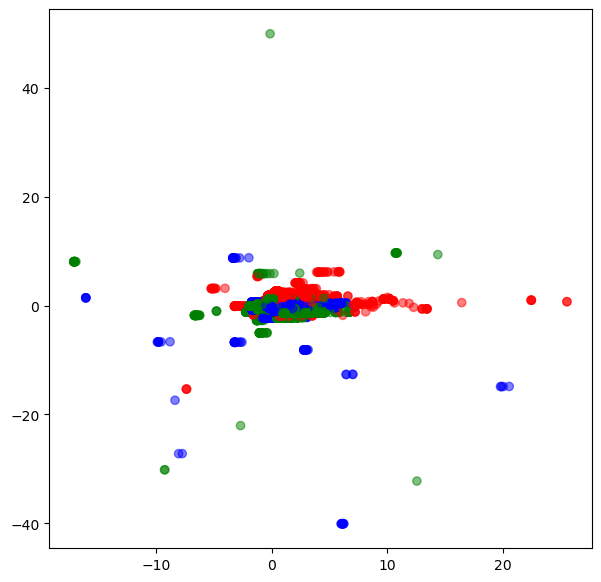

In [30]:
#-- Now setting  'k' = 3 clusters --#

kmeans = KMeans(n_clusters=3)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

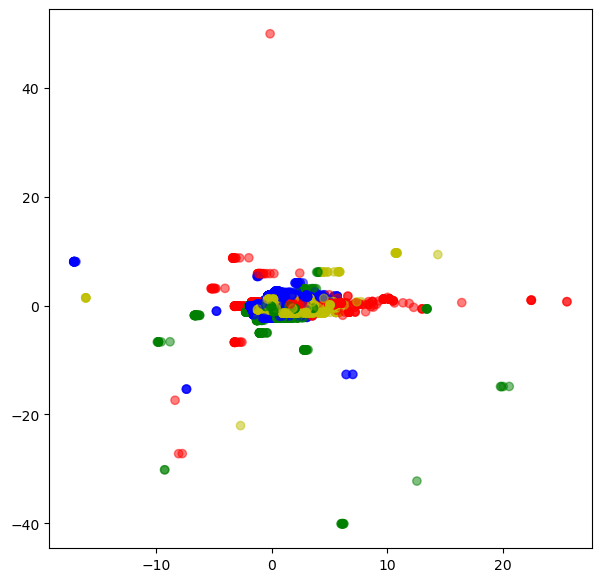

In [31]:
#-- Now setting  'k' = 4 clusters --#

kmeans = KMeans(n_clusters=4)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

The above KMeans cluster visualizations appear to be a dense random blog with scatterings of hapazard residuals.

In [32]:
#-- Saving the dataset to csv for additional cleaning and manipulation --#

df1.head()
check = df1.to_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Politcal Donations Study.csv', index=False)

In [33]:
#-- Dropping the column 'total_time'and 'Total Contract Amount' because it is redundant, all rows have an instance of it --#

df_noAmount = df1.drop(columns=['Amount'])
df_noAmount.head()

,Amazon Basics,Amazon Devices,Amazon Ereaders,Amazon Home,Amazon SMP,Amazon Tablets,Apparel,Art,Art and Craft Supply,Associated Products,...,Subscribe with Amazon - Physical,Target Gift Card,Toy,Trading Cards,VDO Devices,Video Games,Watch,Wireless,Woodworking Tools,eBooks
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
columns_to_drop = df_noAmount.columns[df_noAmount.eq(0).all()]

#-- Drop columns with all zeros --#
df_noAmount.drop(columns=columns_to_drop, inplace=True)
df_noAmount

,Amazon Basics,Amazon Devices,Amazon Ereaders,Amazon Home,Amazon SMP,Amazon Tablets,Apparel,Art,Art and Craft Supply,Associated Products,...,Subscribe with Amazon - Physical,Target Gift Card,Toy,Trading Cards,VDO Devices,Video Games,Watch,Wireless,Woodworking Tools,eBooks
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143921,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
143922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Now conduction Market Basket Analysis

In [35]:
#-- Importing the parsed dataset for Market Basket Analysis --#

dfbi = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /Washington cleaned purchasing .csv')

In [36]:
dfbi.head()

,Apparel,Art and Craft Supply,Automotive Parts and Accessories,Baby Product,Beauty,Book,"Business, Industrial, & Scientific Supplies Basic",CE,Electronic Gift Card,Furniture,...,Personal Computer,Pet Products,Photography,Prestige Beauty,Shoes,Speakers,Sports,Toy,Video Games,Wireless
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
dfbi.shape

(143926, 31)

In [38]:
#-- Passing the entire Dataframe into a correlation Matrix --#
correlation_matrix = dfbi.corr()

<AxesSubplot:>

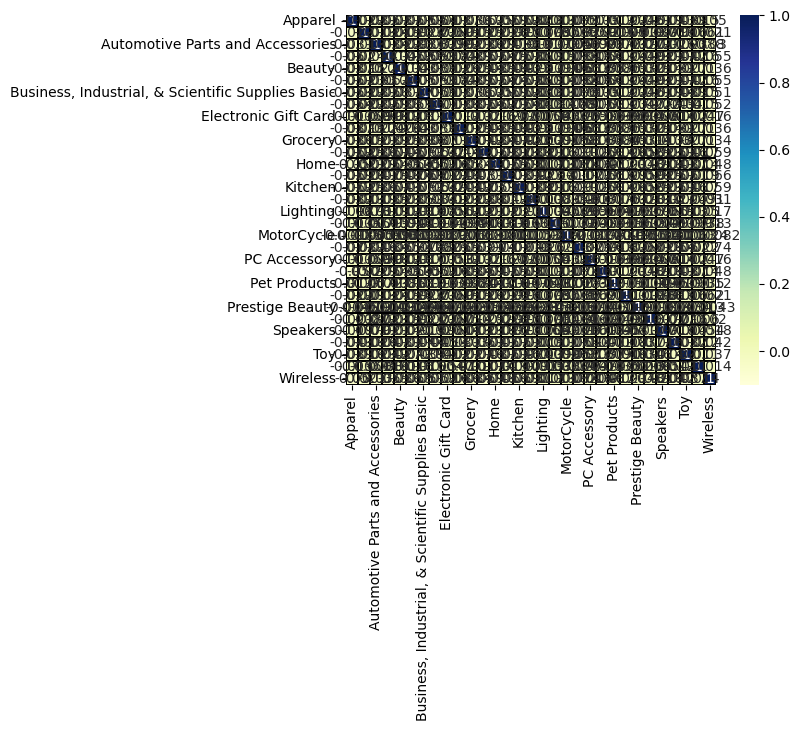

In [39]:
# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# The above correlation matrix is too messy to decern. The dataframe must be split up for further exploration.

# Splitting the large dataset into four seperate datasets: 'a' and 'b' are the 1st half and 2nd half of the variables. Addtionally, 'kids' and 'electronics' are grouped together for exploration. 

In [40]:
a = dfbi[['Apparel','Art and Craft Supply','Automotive Parts and Accessories','Baby Product','Beauty','Book','Business, Industrial, & Scientific Supplies Basic','CE','Electronic Gift Card','Furniture','Grocery','Health and Beauty','Toy']]
b = dfbi[['Kitchen','Lawn & Patio','Lighting','Luggage','MotorCycle','Office Product','PC Accessory','Personal Computer','Pet Products','Photography','Speakers','Sports','Toy','Video Games','Wireless' ]]
kids = dfbi[['Apparel','Art and Craft Supply','Baby Product','Beauty','Book','Grocery','Health and Beauty','Toy','Shoes','Video Games','Sports','Luggage','Prestige Beauty']]
electronics = dfbi[['Speakers','Lighting','Office Product','PC Accessory','Personal Computer','Video Games','Wireless']]

In [41]:
#-- Making Seperate matrices for correlation exploration --#
matrix1 = a.corr()
matrix2 = b.corr()
matrix3 = kids.corr()
matrix4 = electronics.corr()

# Displaying correlations between random set 'a'.

<AxesSubplot:>

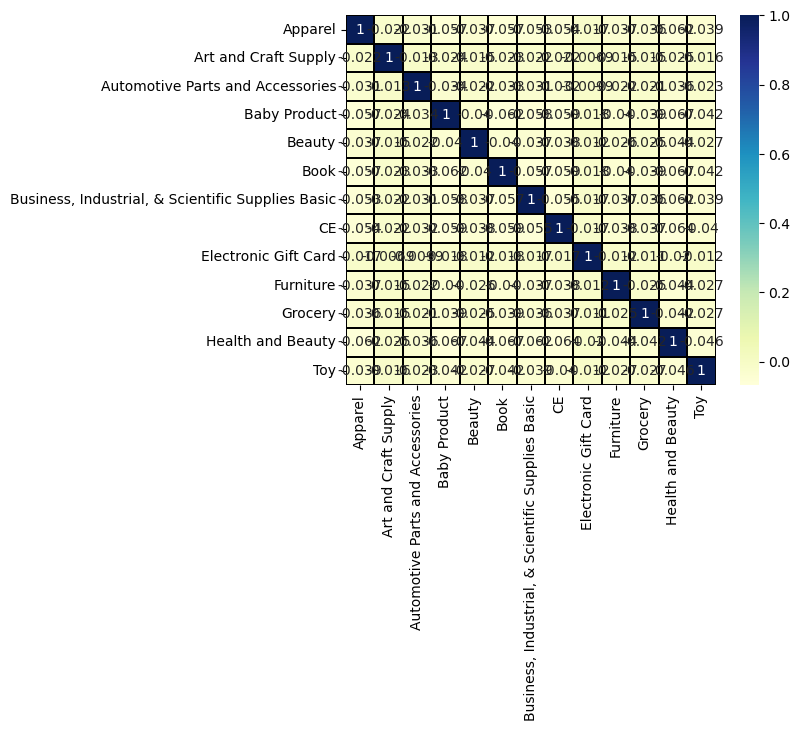

In [42]:
# Draw the heatmap using seaborn
sns.heatmap(matrix1, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# Displaying Correlations between randomset 'b'

<AxesSubplot:>

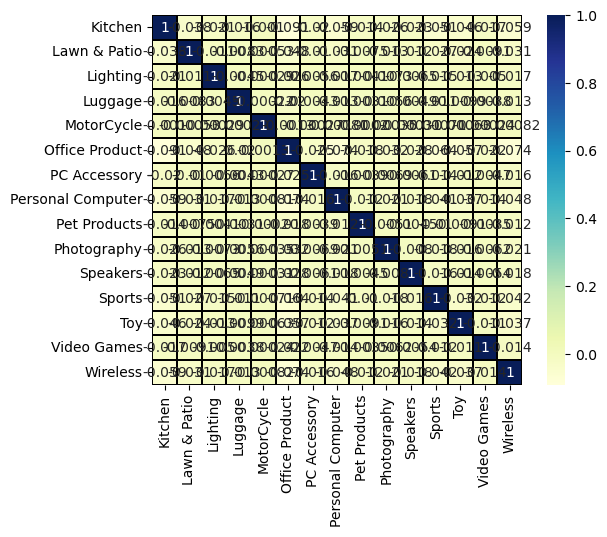

In [43]:
sns.heatmap(matrix2, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)


# Exploring Correlations between the 'kids' iteams

<AxesSubplot:>

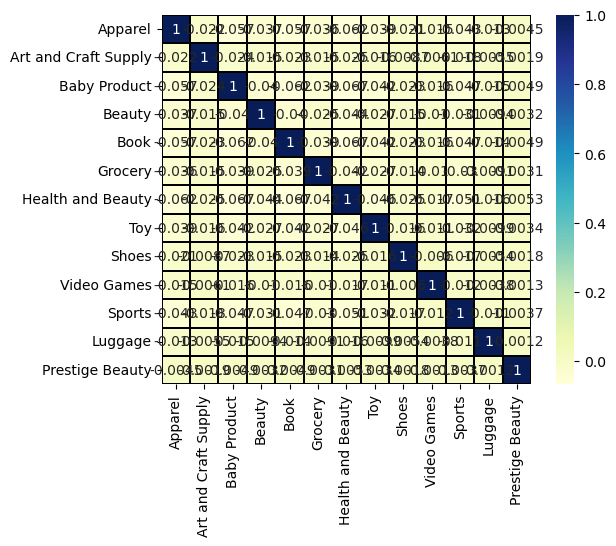

In [44]:
sns.heatmap(matrix3, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)


# Exploring corrleations between 'electronics' items. 

<AxesSubplot:>

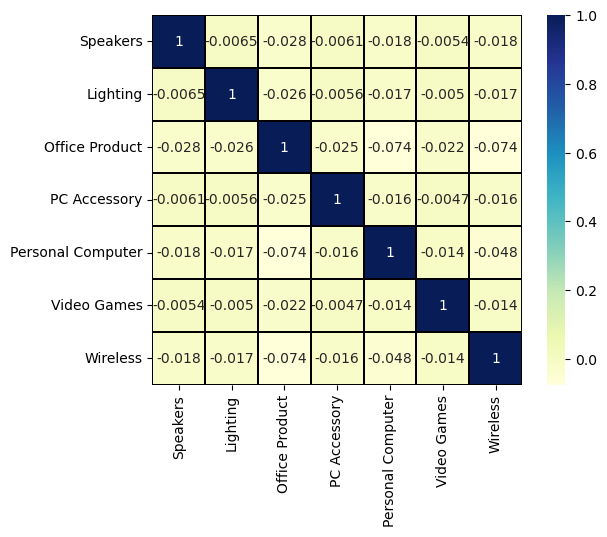

In [45]:
sns.heatmap(matrix4, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# Now running Market Basket Analysis to explore possible co-occurances of items being purhcased together. 

In [46]:
#-- Each row represents a transaction, and each column represents an item --#
transactions = dfbi.values.tolist()

frequent_itemsets = apriori(dfbi, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


The above Market Basket Analysis yeilded no association rules to describe the frequency of itemssets purchased together with a minimum support of 1%. Not suprising considering that the correlation matrices yeild minimal correlation between columns. Moreover, two years of data is not enough for predictive statistics. 
  
However, from the data the following industry intelligence was mined:

We accept the null hypothesis H0: There is NO association between the purchase of two or more products.

These findings and processed datasets can be compiled and compared with all and other states purchasing behavior in the United States. More compiled data over time can then be used to possibly produce accurate forecast models. 
